# Lab | Cross Validation

For this lab, we will build a model on customer churn binary classification problem. You will be using `files_for_lab/Customer-Churn.csv` file.



### Instructions

1. Apply SMOTE for upsampling the data

    - Use logistic regression to fit the model and compute the accuracy of the model.
    - Use decision tree classifier to fit the model and compute the accuracy of the model.
    - Compare the accuracies of the two models.


2. Apply TomekLinks for downsampling

    - It is important to remember that it does not make the two classes equal but only removes the points from the majority class that are close to other points in minority class.
    - Use logistic regression to fit the model and compute the accuracy of the model.
    - Use decision tree classifier to fit the model and compute the accuracy of the model.
    - Compare the accuracies of the two models.
    - You can also apply this algorithm one more time and check the how the imbalance in the two classes changed from the last time.

### Import Libraries

In [87]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import seaborn as sns


from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import TomekLinks

### Load data

In [88]:
churndata = pd.read_csv('files_for_lab/Customer-Churn.csv')#, header=None)
churndata.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


### Basic Data cleaning

#### Standardize header names

In [89]:
churndata.columns = [column.lower().replace(' ','_') for column in churndata.columns]
churndata.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


#### Check data types

In [90]:
dataTypeSeries = churndata.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object


**Change data type of column totalcharges**

In [91]:
churndata['totalcharges'] = pd.to_numeric(churndata['totalcharges'], errors='coerce')

#### Check null values

In [92]:
churndata.isna().sum()

gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

**Fill null values with mean**

In [93]:
churndata['totalcharges'] = churndata['totalcharges'].fillna(churndata['totalcharges'].mean())

#### X-Y Split

In [94]:
X = churndata[['tenure', 'seniorcitizen', 'monthlycharges', 'totalcharges']]
y = churndata['churn']

#### Train Test Split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=18)

### Upsamling with SMOTE

#### Do Upsampling with SMOTE

In [96]:
X_train_smote = X_train.copy()
y_train_smote = y_train.copy()

In [97]:
smote = SMOTE()

X_train_smote, y_train_smote = smote.fit_resample(X_train_smote, y_train_smote)
y_train_smote.value_counts()

No     4116
Yes    4116
Name: churn, dtype: int64

#### Logistic Regression Model

In [98]:
# copy train set resamled with smote for logistic regression model
X_train_smote_lr = X_train_smote.copy()
y_train_smote_lr = y_train_smote.copy()

In [99]:
def classification_models(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    
    score_class = model.score(X_test, y_test)
    
    predictions = model.predict(X_test)
    value_cnt_class = pd.Series(predictions).value_counts()
    
    print('The accuracyscore is: ', score_class, '\n')
    print('Value counts of the model predictions: ', '\n', value_cnt_class)

In [100]:
classification_models(X_train_smote_lr, y_train_smote_lr, X_test, y_test, LogisticRegression(random_state=12, max_iter=100))

The accuracyscore is:  0.7203690560681334 

Value counts of the model predictions:  
 No     794
Yes    615
dtype: int64


In [101]:
def metrics_classifications(X_train, y_train, X_test, y_test, model):
    
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    #confusion matrix
    cf_matrix = confusion_matrix(y_test, predictions)
    group_names = ['True A', 'False A',
                   'False B', 'True B']

    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    
    #classification report
    metrics_class = metrics.classification_report(y_test, predictions)
    print('Classification report:', '\n')
    print(metrics_class)
    
    
    print('Confusion matrix:')
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Classification report: 

              precision    recall  f1-score   support

          No       0.92      0.69      0.79      1058
         Yes       0.47      0.81      0.59       351

    accuracy                           0.72      1409
   macro avg       0.69      0.75      0.69      1409
weighted avg       0.81      0.72      0.74      1409

Confusion matrix:


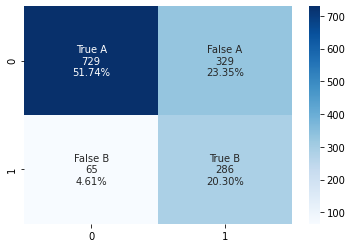

In [102]:
metrics_classifications(X_train_smote_lr, y_train_smote_lr, X_test, y_test, LogisticRegression(random_state=12, max_iter=100))

#### Decision Tree Classifier

In [103]:
# copy train set resamled with smote for decison tree classifier
X_train_smote_dt = X_train_smote.copy()
y_train_smote_dt = y_train_smote.copy()

In [104]:
classification_models(X_train_smote_dt, y_train_smote_dt, X_test, y_test, DecisionTreeClassifier())

The accuracyscore is:  0.7111426543647977 

Value counts of the model predictions:  
 No     961
Yes    448
dtype: int64


Classification report: 

              precision    recall  f1-score   support

          No       0.84      0.76      0.80      1058
         Yes       0.44      0.57      0.49       351

    accuracy                           0.71      1409
   macro avg       0.64      0.66      0.65      1409
weighted avg       0.74      0.71      0.72      1409

Confusion matrix:


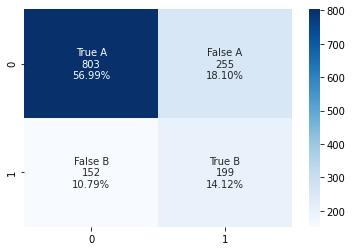

In [105]:
metrics_classifications(X_train_smote_dt, y_train_smote_dt, X_test, y_test, DecisionTreeClassifier())

**Comparison:** <br>
    -<br>
    -<br>
    -<br>

### Downsampling with TomekLinks

It is important to remember that it does not make the two classes equal but only removes the points from the majority class that are close to other points in minority class.

#### Do downsampling with TomeLinks

In [106]:
# Make copy of train data for downsampling
X_train_tkl = X_train.copy()
y_train_tkl = y_train.copy()

In [107]:
tkl = TomekLinks()

X_train_tkl, y_train_tkl = tkl.fit_resample(X_train_tkl, y_train_tkl)
y_train_tkl.value_counts()

No     3651
Yes    1518
Name: churn, dtype: int64

#### Logistic Regression Model

In [108]:
# copy train set resamled with smote for logistic regression model
X_train_tkl_lr = X_train_tkl.copy()
y_train_tkl_lr = y_train_tkl.copy()

In [109]:
classification_models(X_train_tkl_lr, y_train_tkl_lr, X_test, y_test, LogisticRegression(random_state=12, max_iter=100))

The accuracyscore is:  0.794180269694819 

Value counts of the model predictions:  
 No     1076
Yes     333
dtype: int64


Classification report: 

              precision    recall  f1-score   support

          No       0.86      0.87      0.86      1058
         Yes       0.59      0.56      0.58       351

    accuracy                           0.79      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.79      0.79      0.79      1409

Confusion matrix:


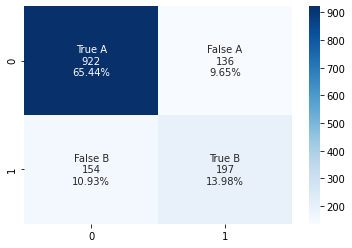

In [110]:
metrics_classifications(X_train_tkl_lr, y_train_tkl_lr, X_test, y_test, LogisticRegression(random_state=12, max_iter=100))

#### Decision Tree Classifier

In [111]:
# copy train set resamled with smote for logistic regression model
X_train_tkl_dt = X_train_tkl.copy()
y_train_tkl_dt = y_train_tkl.copy()

In [112]:
classification_models(X_train_tkl_dt, y_train_tkl_dt, X_test, y_test, DecisionTreeClassifier())

The accuracyscore is:  0.7182398864442867 

Value counts of the model predictions:  
 No     969
Yes    440
dtype: int64


Classification report: 

              precision    recall  f1-score   support

          No       0.84      0.77      0.81      1058
         Yes       0.45      0.57      0.50       351

    accuracy                           0.72      1409
   macro avg       0.65      0.67      0.66      1409
weighted avg       0.75      0.72      0.73      1409

Confusion matrix:


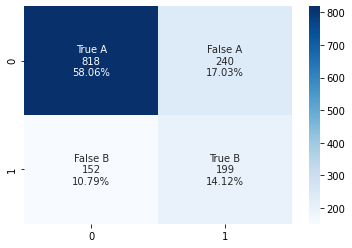

In [113]:
metrics_classifications(X_train_tkl_dt, y_train_tkl_dt, X_test, y_test, DecisionTreeClassifier())

**Comparison:** <br>
    - <br>
    - <br>